In [1]:
import ants
import nibabel as nb
import os
import shutil
import sys
sys.path.append('/home/mathilde/Documents/scripts/meld_fe_io')
from scripts.coregistration import ants_coregister_to_fixed, ants_coregister_with_tranfsorm

In [2]:
moving_file = '/media/mathilde/DATA/projects/MELD_fe/230510_develop_coregister/input/sub-MELDH4P0220/anat/sub-MELDH4P0220_15T_preop_FLAIR.nii.gz'
ref_file = '/home/mathilde/Documents/projects/MELD_fe/MNI_template/MNI152_T1_1mm.nii.gz'
ref_file_stripped = '/home/mathilde/Documents/projects/MELD_fe/MNI_template/MNI152_T1_1mm_brain.nii.gz'
output_file = '/home/mathilde/Documents/projects/MELD_fe/230510_develop_coregister/output/test_coregister_to_MNI.nii.gz'
transform_file = '/home/mathilde/Documents/projects/MELD_fe/230510_develop_coregister/output/transform_to_MNI'

In [15]:
test = nb.load(ref_file_stripped)

In [16]:
data= test.get_fdata()

In [17]:
data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
# Coregister T1 to MNI space and save transform
output_file = '/home/mathilde/Documents/projects/MELD_fe/230510_develop_coregister/output/test_coregister_to_MNI_with_mask.nii.gz'
ants_coregister_to_fixed(moving_file, ref_file_stripped, output_file, save_transform=transform_file, transform_type = 'SyN')

In [3]:
# Coregister T1 to MNI space and save transform, using skull stripped ref
output_file = '/home/mathilde/Documents/projects/MELD_fe/230510_develop_coregister/output/test_coregister_to_MNI_with_skullstrippedref2.nii.gz'
ants_coregister_to_fixed(moving_file, ref_file_stripped, output_file, save_transform=transform_file, transform_type = 'SyN')

In [4]:
# Coregister T1 using transform
output_file = '/home/mathilde/Documents/projects/MELD_fe/230510_develop_coregister/output/test_coregister_with_transform.nii.gz'
ants_coregister_with_tranfsorm(moving_file, ref_file, output_file, transform_file)

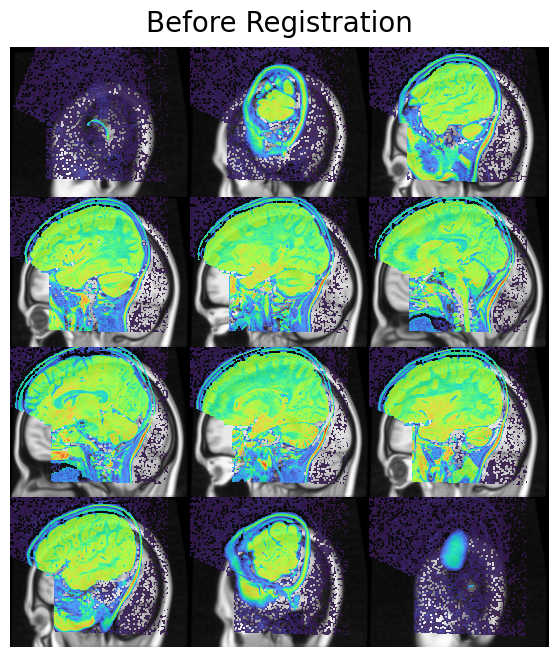

{'warpedmovout': ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]
, 'warpedfixout': ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (176, 212, 256)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (84.7881, 100.2542, -127.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]
, 'fwdtransforms': ['/tmp/tmppaheyz1f1Warp.nii.gz', '/tmp/tmppaheyz1f0GenericAffine.mat'], 'invtransforms': ['/tmp/tmppaheyz1f0GenericAffine.mat', '/tmp/tmppaheyz1f1InverseWarp.nii.gz']}


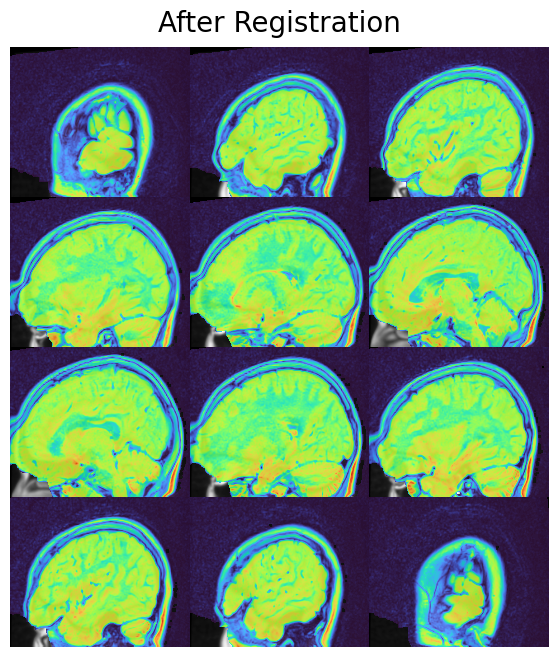

In [47]:
### TEST outside function

fixed = ants.image_read(ref_file)
moving = ants.image_read(moving_file)
fixed.plot(overlay=moving, title='Before Registration')
mytx = ants.registration(fixed=fixed , moving=moving, type_of_transform='SyN' )
print(mytx)
warped_moving = mytx['warpedmovout']
fixed.plot(overlay=warped_moving,
        title='After Registration')

import nibabel as nb
output_file = '/home/mathilde/Documents/projects/MELD_fe/230510_develop_coregister/output/test_coregister_to_MNI.nii.gz'

nii = ants.to_nibabel(warped_moving)
nb.save(nii, output_file)